In [3]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: labelled_newscatcher_dataset.csv  


In [ ]:
!pip install pandas matplotlib seaborn numpy nltk transformers wordcloud fpdf pillow torch

# 1. Ознакомительный анализ данных

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/content/labelled_newscatcher_dataset.csv', delimiter=';')
print(f"Размер данных: {df.shape}")
df.head()

Размер данных: (108774, 6)


topic                                               link          domain  \
0  SCIENCE  https://www.eurekalert.org/pub_releases/2020-0...  eurekalert.org   
1  SCIENCE  https://www.pulse.ng/news/world/an-irresistibl...        pulse.ng   
2  SCIENCE  https://www.express.co.uk/news/science/1322607...   express.co.uk   
3  SCIENCE  https://www.ndtv.com/world-news/glaciers-could...        ndtv.com   
4  SCIENCE  https://www.thesun.ie/tech/5742187/perseid-met...       thesun.ie   

        published_date                                              title lang  
0  2020-08-06 13:59:45  A closer look at water-splitting's solar fuel ...   en  
1  2020-08-12 15:14:19  An irresistible scent makes locusts swarm, stu...   en  
2  2020-08-13 21:01:00  Artificial intelligence warning: AI will know ...   en  
3  2020-08-03 22:18:26   Glaciers Could Have Sculpted Mars Valleys: Study   en  
4  2020-08-12 19:54:36  Perseid meteor shower 2020: What time and how ...   en

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Выводим общую информацию о датасете
print(df.info())

# Проверяем наличие пропущенных значений
print("\nПропущенные значения по столбцам:")
print(df.isnull().sum())

# Выводим статистические характеристики для числовых столбцов (если есть)
print("\nСтатистические характеристики:")
print(df.describe(include='all'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108774 entries, 0 to 108773
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   topic           108774 non-null  object
 1   link            108774 non-null  object
 2   domain          108774 non-null  object
 3   published_date  108774 non-null  object
 4   title           108774 non-null  object
 5   lang            108774 non-null  object
dtypes: object(6)
memory usage: 5.0+ MB
None

Пропущенные значения по столбцам:
topic             0
link              0
domain            0
published_date    0
title             0
lang              0
dtype: int64

Статистические характеристики:
             topic                     link           domain  \
count       108774                   108774           108774   
unique           8                   106130             5164   
top     TECHNOLOGY  https://www.google.com/  dailymail.co.uk   
freq         15000           


Распределение тем:
topic
TECHNOLOGY       15000
HEALTH           15000
WORLD            15000
ENTERTAINMENT    15000
SPORTS           15000
BUSINESS         15000
NATION           15000
SCIENCE           3774
Name: count, dtype: int64


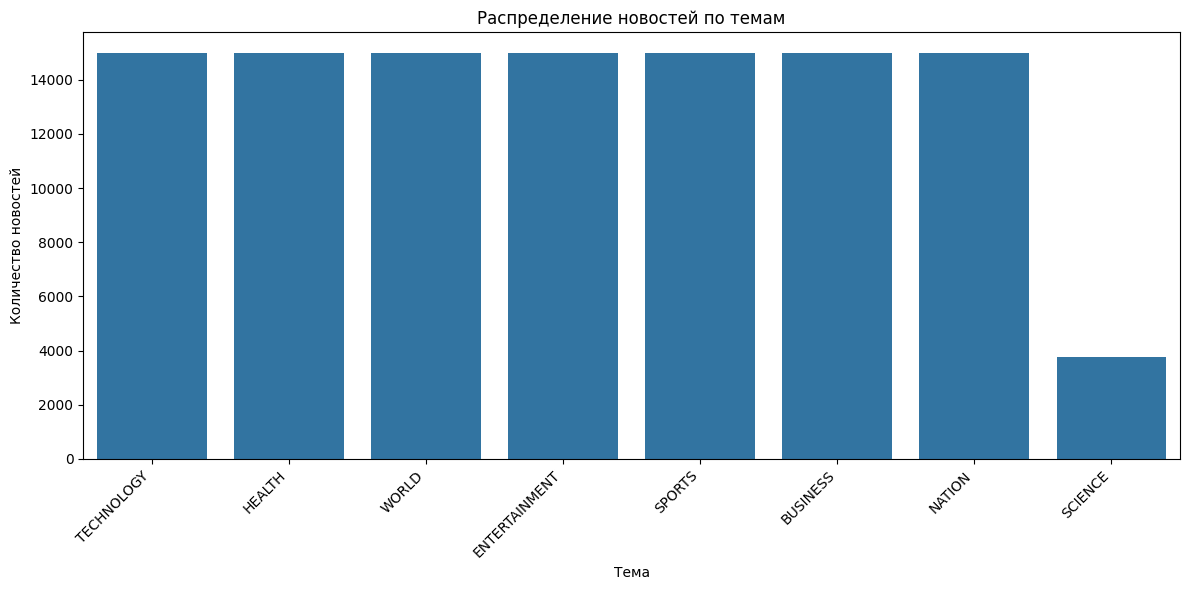

In [7]:
# Анализируем распределение тем
topic_counts = df['topic'].value_counts()
print("\nРаспределение тем:")
print(topic_counts)

# Визуализируем распределение тем
plt.figure(figsize=(12, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title('Распределение новостей по темам')
plt.xlabel('Тема')
plt.ylabel('Количество новостей')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Топ-20 доменов:
domain
dailymail.co.uk                1855
theguardian.com                1439
express.co.uk                  1403
timesofindia.indiatimes.com    1313
globenewswire.com              1187
bbc.co.uk                      1018
forbes.com                      935
stuff.co.nz                     870
bbc.com                         852
cbc.ca                          816
thesun.co.uk                    805
news.com.au                     796
indianexpress.com               795
reuters.com                     778
mirror.co.uk                    767
cnn.com                         738
thestar.com.my                  731
nzherald.co.nz                  682
abc.net.au                      657
nytimes.com                     652
Name: count, dtype: int64


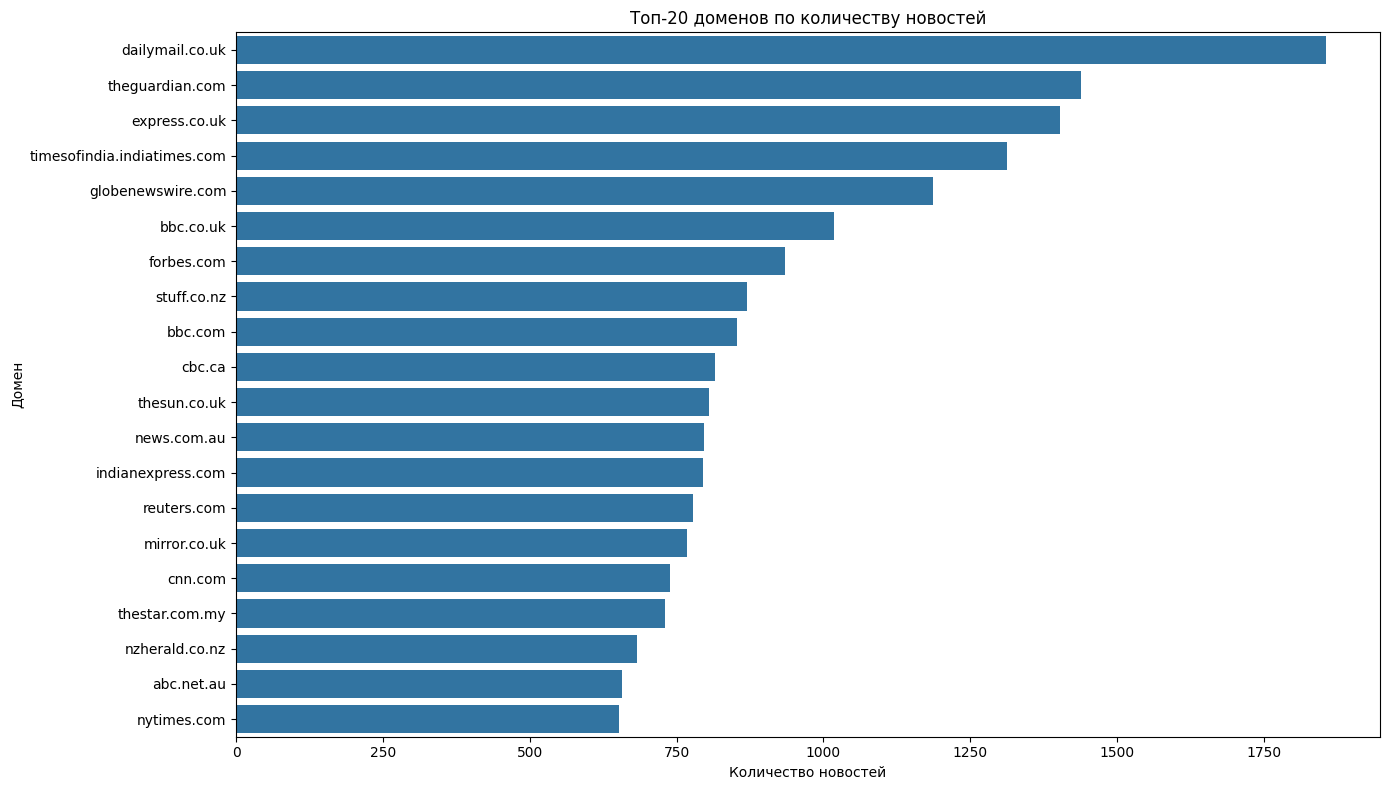

In [8]:
# Анализируем топ-20 доменов
domain_counts = df['domain'].value_counts().head(20)
print("\nТоп-20 доменов:")
print(domain_counts)

# Визуализируем топ-20 доменов
plt.figure(figsize=(14, 8))
sns.barplot(x=domain_counts.values, y=domain_counts.index)
plt.title('Топ-20 доменов по количеству новостей')
plt.xlabel('Количество новостей')
plt.ylabel('Домен')
plt.tight_layout()
plt.show()



Распределение по годам:
year
2012         3
2015         1
2016         3
2017        16
2018        25
2019       110
2020    108616
Name: count, dtype: int64


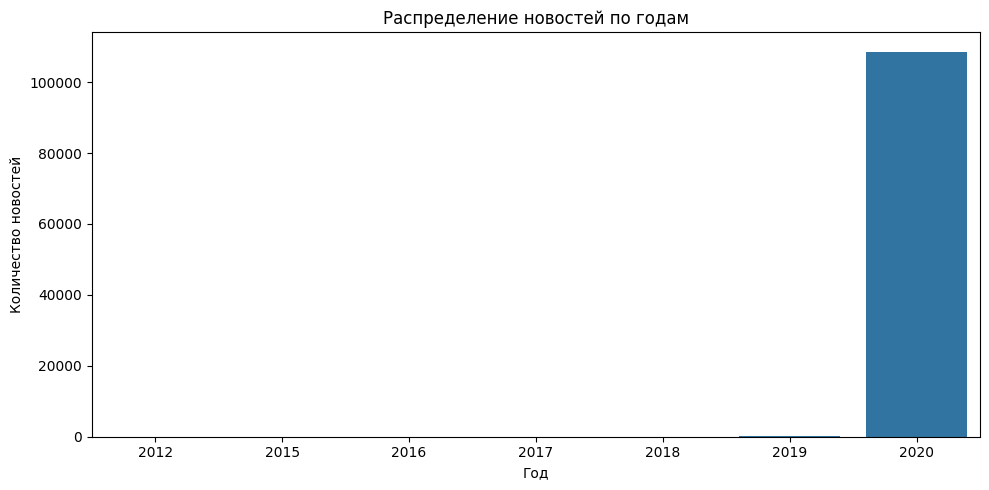

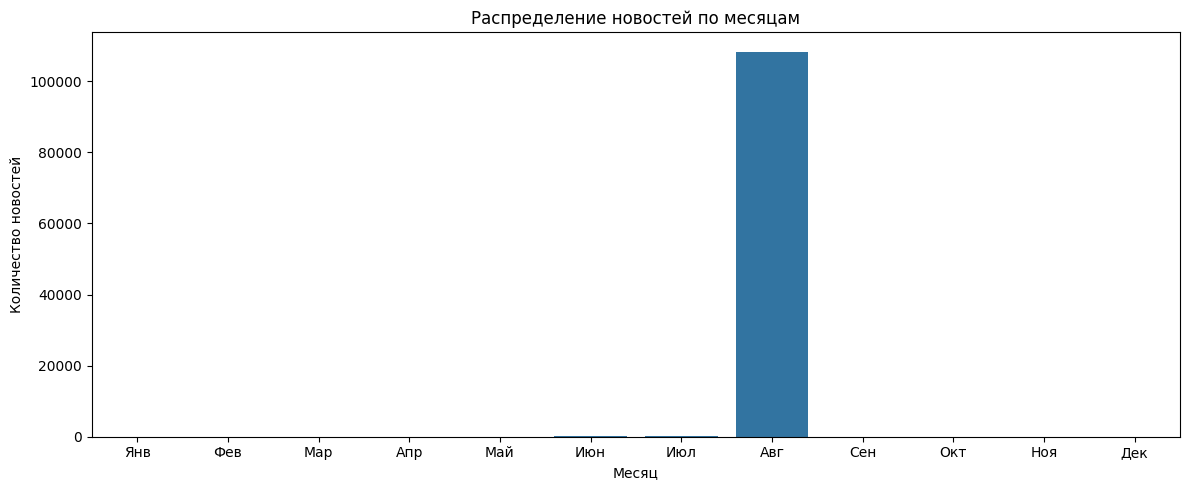

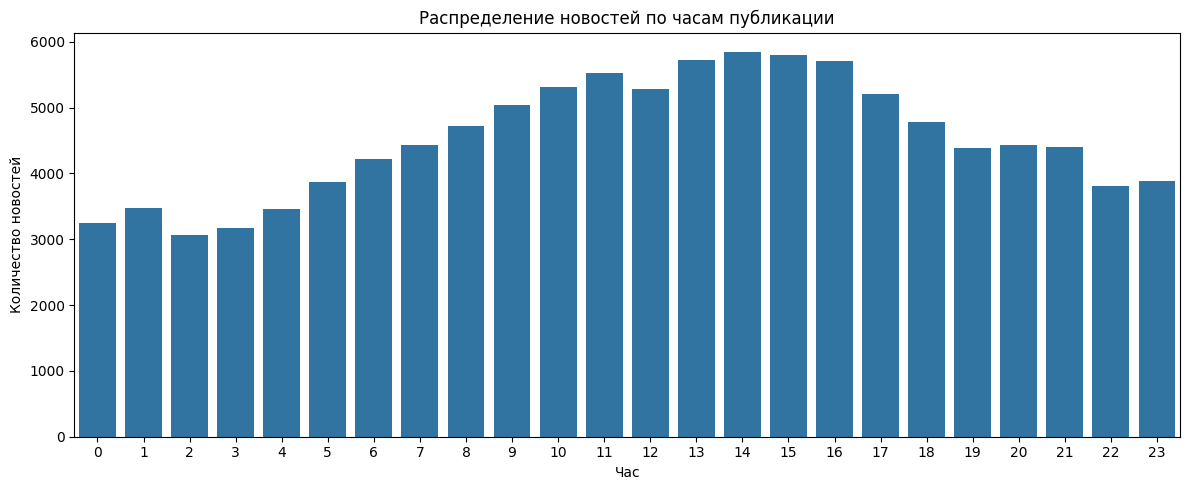

In [9]:
# Преобразуем строковые даты в datetime
df['published_date'] = pd.to_datetime(df['published_date'])

# Извлекаем компоненты даты
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day
df['hour'] = df['published_date'].dt.hour

# Анализируем распределение по годам
year_counts = df['year'].value_counts().sort_index()
print("\nРаспределение по годам:")
print(year_counts)

# Визуализируем распределение по годам
plt.figure(figsize=(10, 5))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Распределение новостей по годам')
plt.xlabel('Год')
plt.ylabel('Количество новостей')
plt.tight_layout()
plt.show()

# Анализируем распределение по месяцам
month_counts = df['month'].value_counts().sort_index()
month_names = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
month_counts.index = [month_names[i-1] for i in month_counts.index]

plt.figure(figsize=(12, 5))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Распределение новостей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество новостей')
plt.tight_layout()
plt.show()

# Анализируем распределение по часам
hour_counts = df['hour'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.title('Распределение новостей по часам публикации')
plt.xlabel('Час')
plt.ylabel('Количество новостей')
plt.tight_layout()
plt.show()


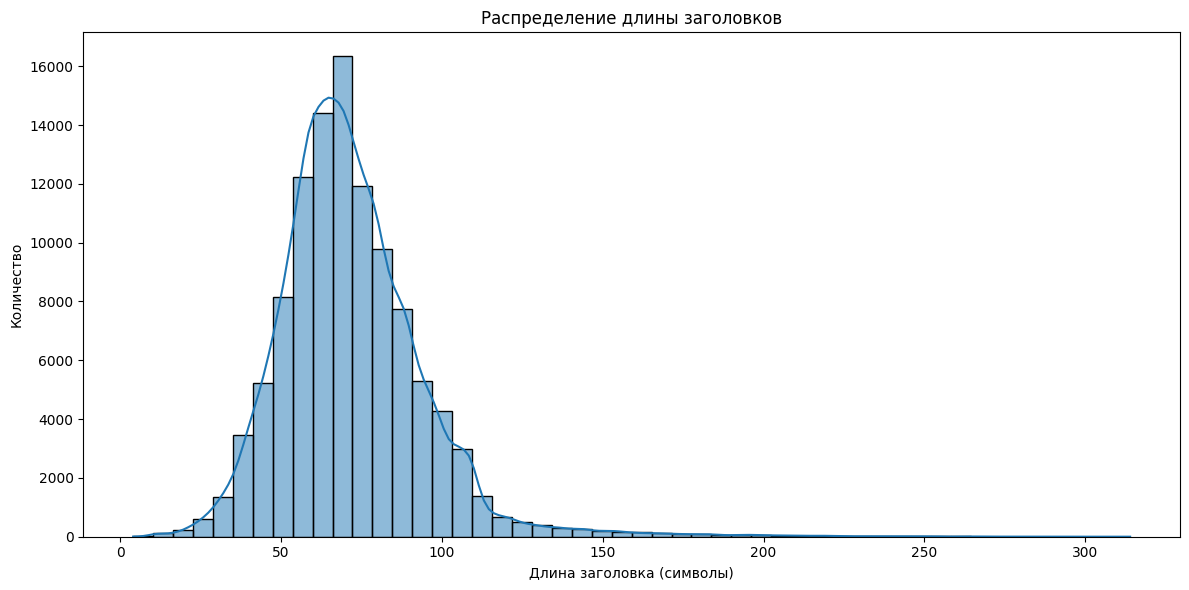


Статистика длины заголовков:
count    108774.000000
mean         71.798297
std          22.729889
min           4.000000
25%          58.000000
50%          69.000000
75%          83.000000
max         314.000000
Name: title_length, dtype: float64


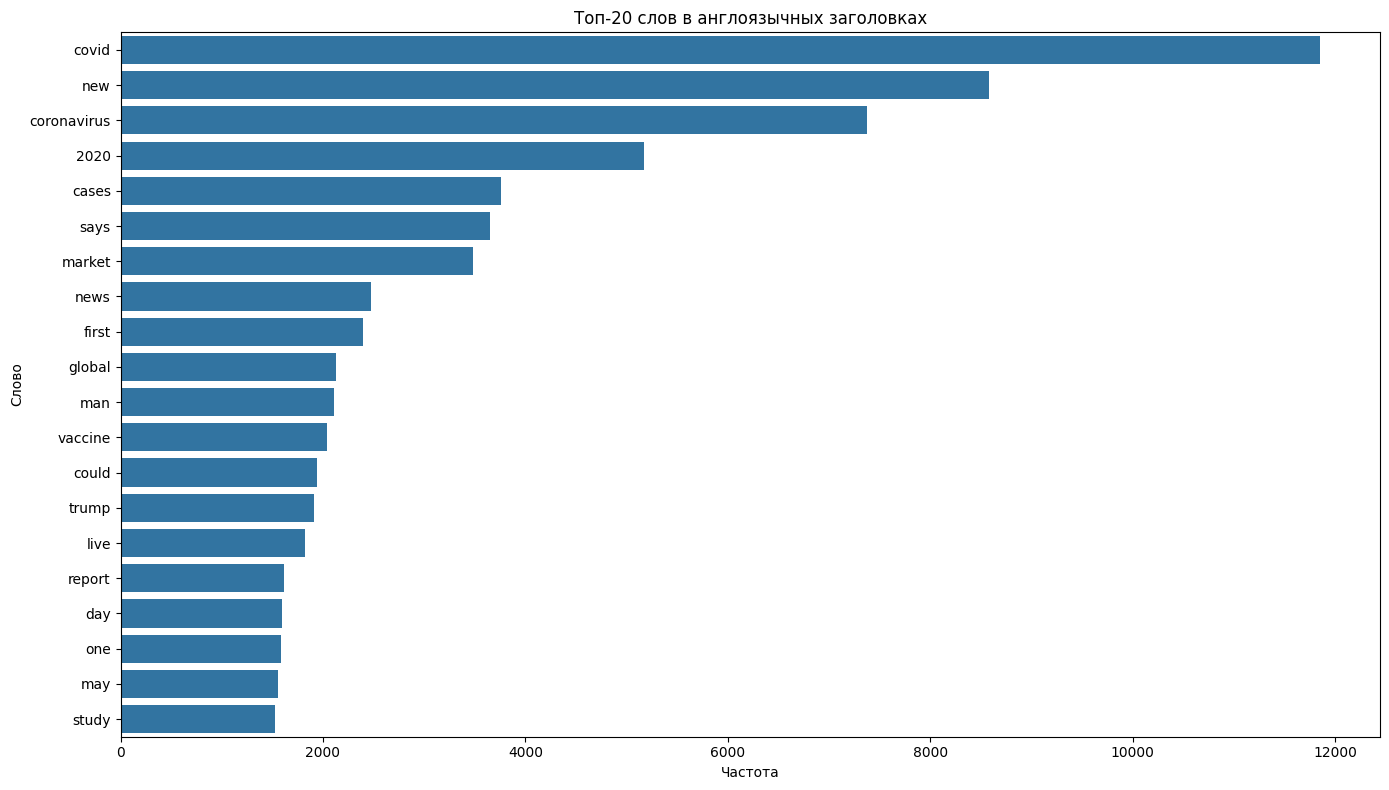

In [10]:
# Анализируем длину заголовков
df['title_length'] = df['title'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['title_length'], bins=50, kde=True)
plt.title('Распределение длины заголовков')
plt.xlabel('Длина заголовка (символы)')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

print("\nСтатистика длины заголовков:")
print(df['title_length'].describe())

# Анализируем популярные слова в заголовках (только для англоязычных новостей)
stop_words = set(stopwords.words('english'))

def extract_words(text):
    # Извлекаем слова, удаляем пунктуацию и приводим к нижнему регистру
    words = re.findall(r'\b\w+\b', text.lower())
    # Удаляем стоп-слова
    return [word for word in words if word not in stop_words and len(word) > 2]

# Применяем только к английским заголовкам
en_titles = df[df['lang'] == 'en']['title']
all_words = []
for title in en_titles:
    all_words.extend(extract_words(title))

word_counts = Counter(all_words)
top_words = pd.DataFrame(word_counts.most_common(20), columns=['Слово', 'Частота'])

plt.figure(figsize=(14, 8))
sns.barplot(x='Частота', y='Слово', data=top_words)
plt.title('Топ-20 слов в англоязычных заголовках')
plt.tight_layout()
plt.show()


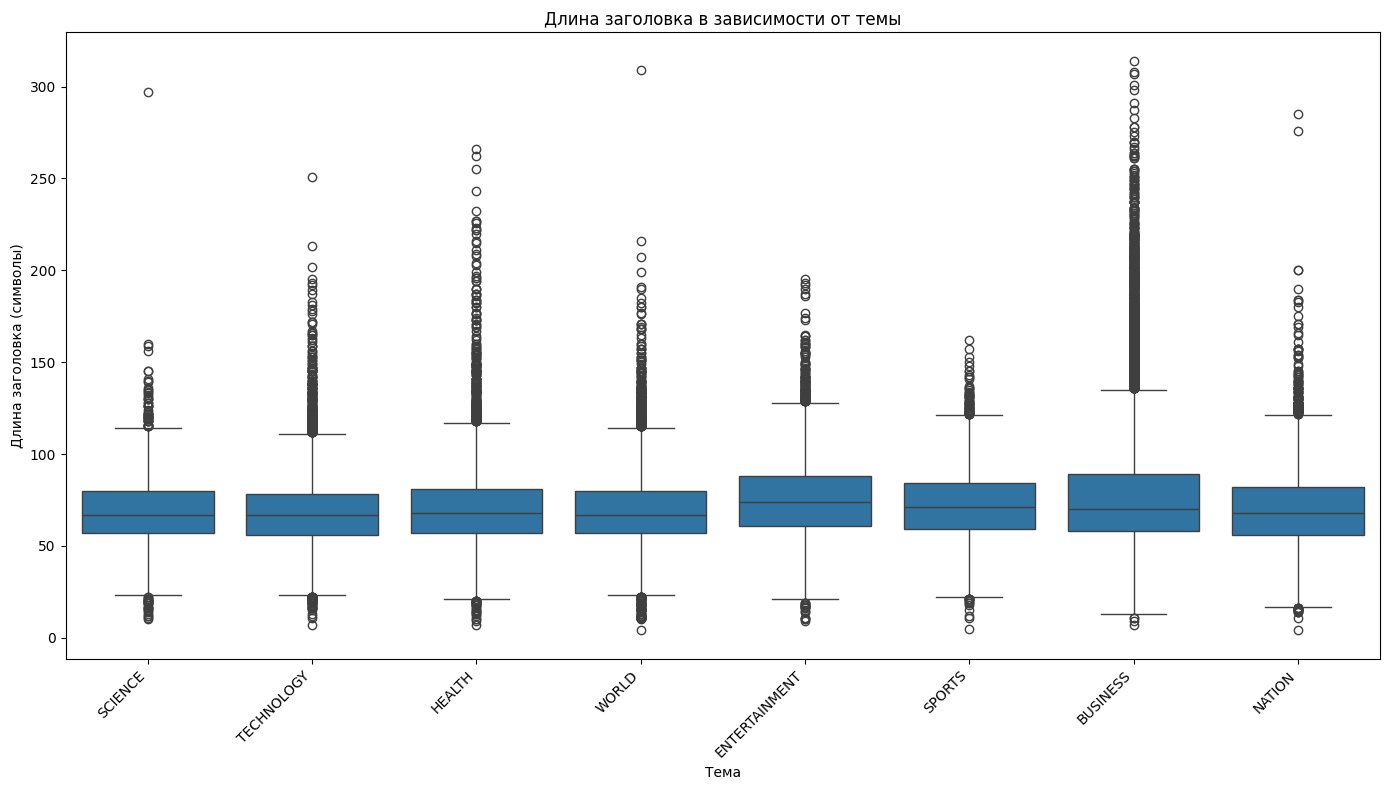

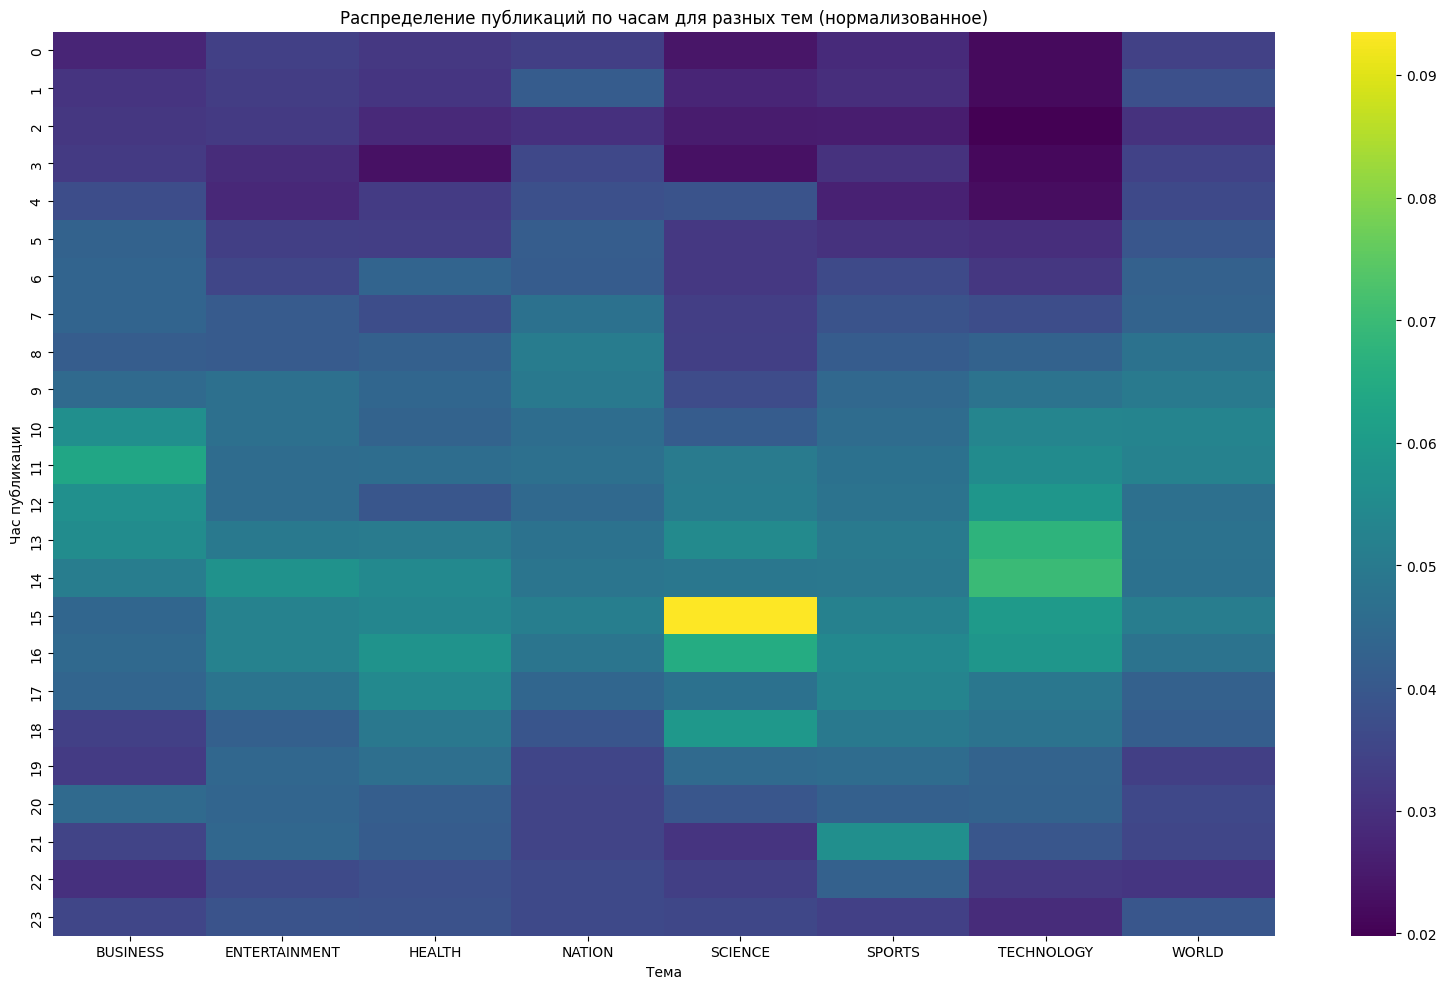

In [11]:
# Анализируем взаимосвязь между темой и длиной заголовка
plt.figure(figsize=(14, 8))
sns.boxplot(x='topic', y='title_length', data=df)
plt.title('Длина заголовка в зависимости от темы')
plt.xlabel('Тема')
plt.ylabel('Длина заголовка (символы)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Анализируем взаимосвязь между темой и временем публикации
topic_hour = pd.crosstab(df['hour'], df['topic'])
topic_hour_norm = topic_hour.div(topic_hour.sum(axis=0), axis=1)

plt.figure(figsize=(16, 10))
sns.heatmap(topic_hour_norm, cmap='viridis', annot=False)
plt.title('Распределение публикаций по часам для разных тем (нормализованное)')
plt.xlabel('Тема')
plt.ylabel('Час публикации')
plt.tight_layout()
plt.show()


# Идентификация возможных методов ML/NLP, которые помогут выполнить поставленную задачу

Для производственного бизнеса, обеспокоенного своей репутацией в СМИ, можно предложить несколько кейсов применения методов машинного обучения и обработки естественного языка. Я придумал несколько кейсов, которые идеально подойдут для решения данной задачи.

Представленные мною кейсы демонстрируют широкие возможности применения методов машинного обучения и обработки естественного языка для управления репутацией производственного бизнеса в СМИ. Внедрение таких решений позволит:

1. Эффективно мониторить релевантные для бизнеса публикации в СМИ
2. Анализировать тональность публикаций и выявлять негативные тренды
3. Отслеживать ключевые тренды и темы в отраслевых СМИ
4. Классифицировать новости по уровню репутационного риска
5. Выявлять наиболее влиятельные СМИ в отрасли
6. Прогнозировать информационные тренды и репутационные риски
7. Получать регулярные автоматические отчеты о состоянии репутации

Все это в совокупности позволит компании эффективно управлять своей репутацией в СМИ и минимизировать негативное влияние на продажи.

Первый кейс направлен на анализ новостного потока из датасета и выявляет публикации, релевантные для производственного бизнеса клиента. Это позволяет сосредоточиться на мониторинге именно тех новостей, которые могут повлиять на репутацию компании, и не тратить ресурсы на обработку нерелевантной информации.

Второй кейс направлен на анализ тональности публикаций в отраслевых СМИ. Система анализирует тональность заголовков новостей из отраслевых источников, что позволяет выявить общий информационный фон вокруг производственной отрасли, а также определить источники с наиболее негативной тональностью. Это помогает клиенту понять, какие СМИ могут представлять репутационную угрозу, и разработать соответствующую коммуникационную стратегию.

Третий кейс направлен на классификацию новостей по потенциальному влиянию на репутацию: он генерирует рекомендаций по управлению репутацией. Система классифицирует новости по потенциальному влиянию на репутацию компании, выделяя публикации с высоким, средним и низким уровнем риска. Это позволяет клиенту сосредоточить внимание на наиболее критичных публикациях и оперативно реагировать на потенциальные репутационные угрозы.

Четвертый кейс направлен на прогнозирование информационных трендов и репутационных рисков: данная система анализирует динамику публикаций, выявляет информационные тренды и прогнозирует их развитие. Также она идентифицирует публикации с потенциальными репутационными рисками и прогнозирует динамику таких рисков. Это позволяет клиенту предвидеть потенциальные репутационные угрозы и заблаговременно разрабатывать стратегии реагирования.

И пятый кейс делает автоматическаю генерацию отчетов о репутации в отрасли. То есть, он автоматически генерирует периодические отчеты о состоянии репутации в отрасли, включая анализ тональности публикаций, выявление трендов, идентификацию репутационных рисков и формирование рекомендаций. Это позволяет клиенту получать регулярную аналитику о состоянии информационного поля и принимать обоснованные решения по управлению репутацией..

В итоге я остановился на 3 кейсе потому-что мне он показался более подходящим для решения данной задачи клиента, демонстрирующий применение NLP в бизнес-среде.

# Сделать простой прототип одного из кейсов, который будет демонстрировать применение ML/NLP-инжиниринга в бизнес-задаче

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Анализируем тональность 500 заголовков...

Распределение новостей по потенциальному влиянию на репутацию:
MEDIUM_RISK: 300 (60.0%)
LOW_RISK: 190 (38.0%)
HIGH_RISK: 10 (2.0%)


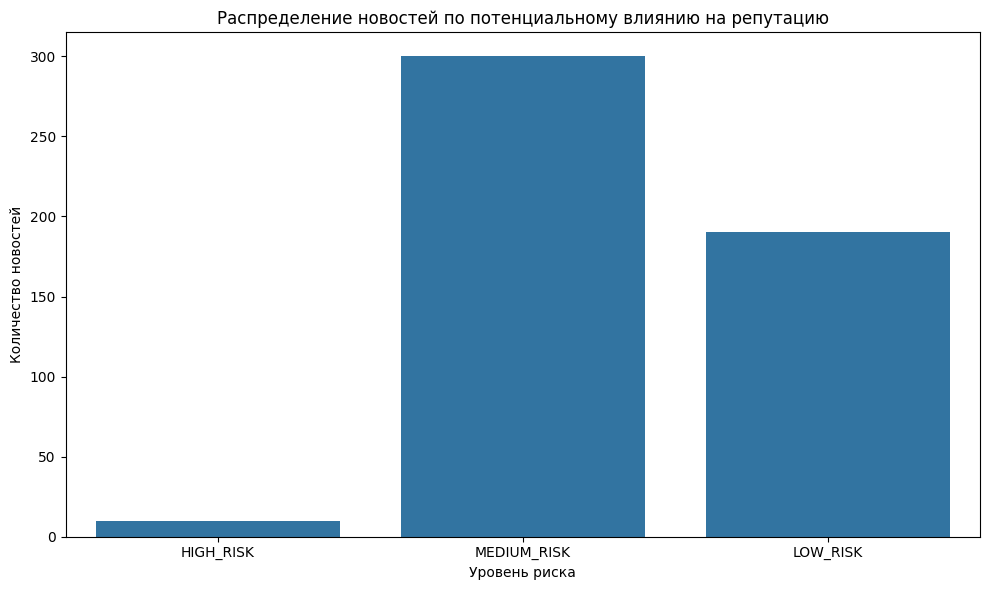

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

# Загрузка датасета
df = pd.read_csv('/content/labelled_newscatcher_dataset.csv', delimiter=';')

# Фильтрация англоязычных новостей по релевантным темам
industry_topics = ['BUSINESS', 'ECONOMICS', 'SCIENCE', 'TECH']
industry_news = df[(df['lang'] == 'en') & (df['topic'].isin(industry_topics))]

# Анализ тональности заголовков
sentiment_analyzer = pipeline('sentiment-analysis')

# Ограничим анализ первыми 500 новостями для экономии времени
sample_size = min(500, len(industry_news))
sample_news = industry_news.sample(sample_size, random_state=42)

print(f"Анализируем тональность {sample_size} заголовков...")
sample_news['sentiment'] = sample_news['title'].apply(
    lambda x: sentiment_analyzer(x)[0]['label']
)
sample_news['sentiment_score'] = sample_news['title'].apply(
    lambda x: sentiment_analyzer(x)[0]['score']
)

# Определение ключевых слов, связанных с репутационными рисками
reputation_risk_keywords = [
    "scandal", "lawsuit", "investigation", "fine", "penalty",
    "violation", "recall", "defect", "failure", "accident",
    "layoff", "strike", "protest", "controversy", "crisis",
    "complaint", "pollution", "waste", "toxic", "hazard",
    "safety", "health", "worker", "labor", "union"
]

# Функция для проверки наличия ключевых слов риска в тексте
def contains_risk_keywords(text):
    if not isinstance(text, str):
        return 0
    text = text.lower()
    return sum(1 for keyword in reputation_risk_keywords if keyword in text)

# Добавление признака наличия ключевых слов риска
sample_news['risk_keywords_count'] = sample_news['title'].apply(contains_risk_keywords)

# Создание признака потенциального влияния на репутацию
def reputation_impact(row):
    # Высокий риск: негативная тональность + ключевые слова риска
    if row['sentiment'] == 'NEGATIVE' and row['risk_keywords_count'] > 0:
        return 'HIGH_RISK'
    # Средний риск: негативная тональность или ключевые слова риска
    elif row['sentiment'] == 'NEGATIVE' or row['risk_keywords_count'] > 0:
        return 'MEDIUM_RISK'
    # Низкий риск: позитивная тональность
    else:
        return 'LOW_RISK'

sample_news['reputation_impact'] = sample_news.apply(reputation_impact, axis=1)

# Анализ распределения потенциального влияния на репутацию
impact_counts = sample_news['reputation_impact'].value_counts()
print("\nРаспределение новостей по потенциальному влиянию на репутацию:")
for impact, count in impact_counts.items():
    print(f"{impact}: {count} ({count/len(sample_news)*100:.1f}%)")

# Визуализация распределения
plt.figure(figsize=(10, 6))
sns.countplot(x='reputation_impact', data=sample_news, order=['HIGH_RISK', 'MEDIUM_RISK', 'LOW_RISK'])
plt.title('Распределение новостей по потенциальному влиянию на репутацию')
plt.xlabel('Уровень риска')
plt.ylabel('Количество новостей')
plt.tight_layout()
plt.show()



Отчет о классификации:
              precision    recall  f1-score   support

   HIGH_RISK       1.00      0.33      0.50         3
    LOW_RISK       0.35      0.52      0.42        48
 MEDIUM_RISK       0.69      0.55      0.61        99

    accuracy                           0.53       150
   macro avg       0.68      0.47      0.51       150
weighted avg       0.59      0.53      0.55       150



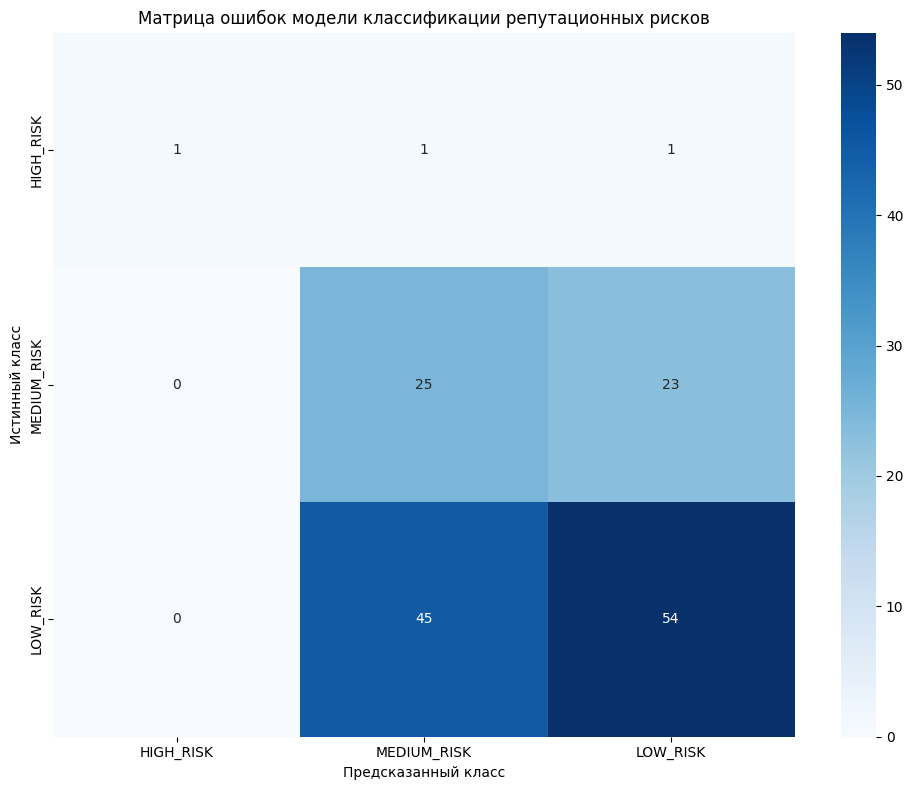

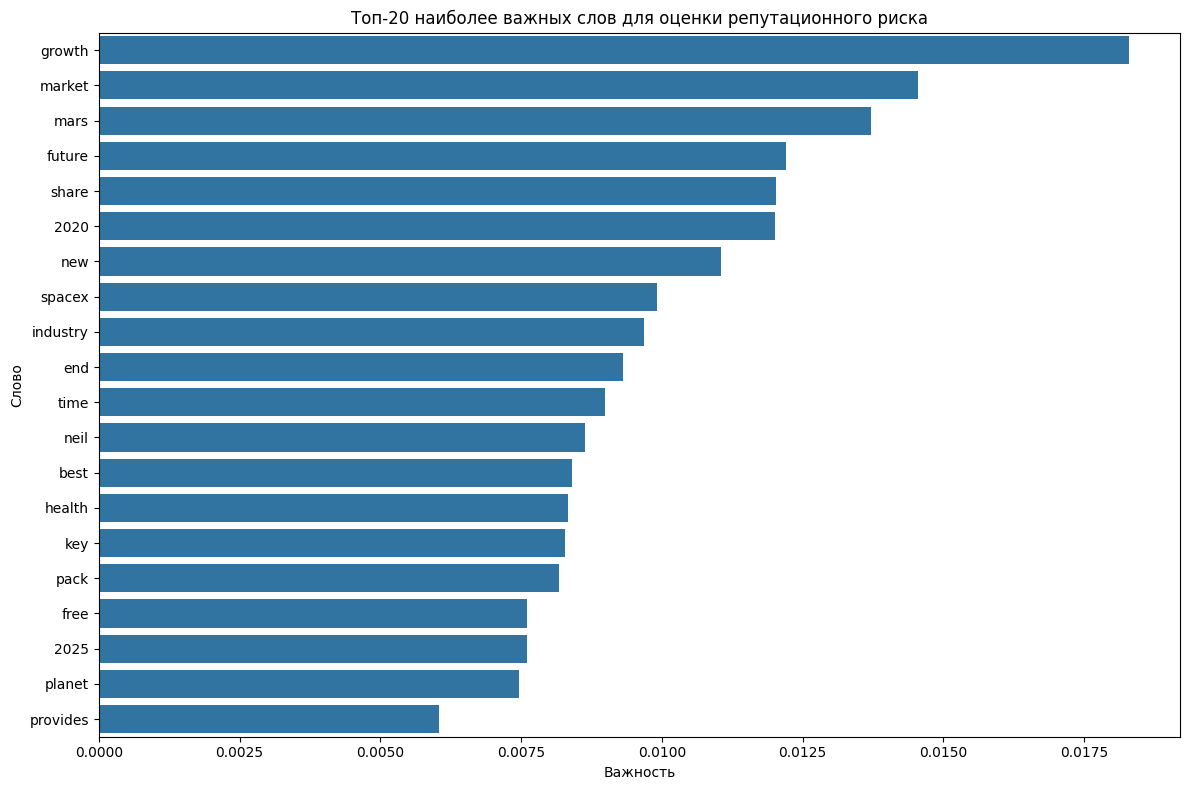


Примеры новостей с высоким риском для репутации:
1. Rats seen scuttling around mental health ward garden (Источник: bbc.co.uk)
2. US STOCKS SNAPSHOT-S&P 500 dips at open as labor market rebound falters (Источник: reuters.com)
3. Medical Microelectromechanical Systems (MEMS) Market Overview,Outlook,Recent Trend by 2026| GE Measurement & Control, Honeywell Sensing and Control, Omron Healthcare (Источник: primefeed.in)
4. Massive BA fine reduction could 'completely undermine' GDPR (Источник: telegraph.co.uk)
5. Workers diagnosed with Covid-19 or certified to self-isolate can claim special illness benefit (Источник: irishtimes.com)
6. Health Canada recalls hand sanitizer gel due to 'health risks' (Источник: vancouverisawesome.com)
7. Covid warriors will be first to get vaccinated, once we get it: MoS Health (Источник: business-standard.com)
8. Recalled onions linked to Salmonella outbreak; 36 cases in Michigan (Источник: clickondetroit.com)
9. William Hill to permanently close 119 shops d

In [18]:
# Обучение модели для предсказания влияния на репутацию
# Векторизация заголовков
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(sample_news['title'])
y = sample_news['reputation_impact']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))

# Визуализация матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['HIGH_RISK', 'MEDIUM_RISK', 'LOW_RISK'],
            yticklabels=['HIGH_RISK', 'MEDIUM_RISK', 'LOW_RISK'])
plt.title('Матрица ошибок модели классификации репутационных рисков')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.tight_layout()
plt.show()

# Анализ важности признаков
feature_importances = pd.DataFrame({
    'feature': vectorizer.get_feature_names_out(),
    'importance': model.feature_importances_
})
top_features = feature_importances.sort_values('importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Топ-20 наиболее важных слов для оценки репутационного риска')
plt.xlabel('Важность')
plt.ylabel('Слово')
plt.tight_layout()
plt.show()

# Примеры новостей с высоким риском для репутации
high_risk_news = sample_news[sample_news['reputation_impact'] == 'HIGH_RISK']
print("\nПримеры новостей с высоким риском для репутации:")
for i, (_, row) in enumerate(high_risk_news.head(10).iterrows(), 1):
    print(f"{i}. {row['title']} (Источник: {row['domain']})")

# Детализация дизайна системы и ключевых сложностей для кейса 4: "Классификация новостей по потенциальному влиянию на репутацию"

Архитектура системы:
    A[Data Sources] --> B[Data Ingestion]
    B --> C[Data Validation]
    C --> D[Feature Store]
    D --> E[Model Training]
    E --> F[Model Registry]
    F --> G[Model Serving]
    G --> H[Monitoring]
    H --> I[Feedback Loop]
    I --> E

- Data Ingestion Layer

Источники данных:

Новостные RSS-ленты (Real-time)
Социальные медиа (Twitter, LinkedIn)
Веб-скрапинг (дополнительные источники)

Технологии: Apache Kafka, AWS Kinesis, Custom Scrapers
- Data Validation & Preprocessing

Вызовы:

Обработка мультиязычных данных
Нормализация временных меток
Удаление дубликатов (near-duplicate detection)

- Feature Engineering Pipeline

Особенности:

NLP-фичи: TF-IDF, Word Embeddings (BERT), Topic Modeling
Контекстные фичи: Источник, Автор, Геолокация
Временные фичи: Частота упоминаний, Velocity изменения тональности
- Model Serving Architecture

Стек технологий:

FastAPI для REST API
Redis для кэширования
Docker/Kubernetes для оркестрации

Ключевые сложности и решения
- Проблема концептуального дрейфа (Concept Drift)

Вызов: Новостные тренды и язык меняются со временем
Решение:

Реализация динамического переобучения

- Мультиязычная обработка

Вызов: Поддержка 50+ языков с разной лингвистической структурой
Решение:

Многоязычные BERT-модели
Language Detection API

Обработка edge-кейсов

Примеры проблем:

Сатирические новости (The Onion)
Локальные идиомы и сленг
Новости с противоречивым контекстом

Масштабирование инфраструктуры

Требования:

Обработка 10K+ запросов/сек
Latency < 200ms

Архитектурные решения:

Горизонтальное масштабирование с Kubernetes
Асинхронная обработка через Celery/RabbitMQ
GPU-оптимизация для трансформерных моделей



Рекомендации по реализации

Поэтапный rollout:

Начать с английского языка и 3 основных тем
Постепенно добавлять языки и домены

Инфраструктурные инвестиции:

Выделенный GPU-кластер для обучения
Managed Kafka для обработки потоков

Команда:

ML Engineer: 2 чел
Data Engineer: 1 чел
DevOps: 1 чел
Subject Matter Expert: 0.5 ставки

Таймлайн:

Прототип: 2-4 недели
Пилот: 6-8 недель
Продакшн: 12-16 недель

Критические точки отказа

Data Pipeline Breakdown:

Решение: Дублирующие ETL-процессы
Мониторинг: Health checks каждые 5 минут

Model Degradation:

Решение: Автоматический rollback версий
Триггер: 10% падение F1-score

Security Breach:

Решение: Isolated VPC с Bastion host
Аудит: Ежеквартальные penetration tests

Итоговая архитектура потребует ~6-8 месяцев разработки сильной командой из 4 человек, с бюджетом от $500K. Ключевой успех будет зависеть от качества данных и способности системы адаптироваться к быстро меняющемуся медиа-ландшафту.